# 3. Cross Validation And L2 Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5),dpi=80) 

* define functions

In [2]:
# data_reading function
def read_input(path):
    return pd.read_table(path)


In [3]:
# computer the cost function(square error)
def computeCost(X1,Y,w,reg):
    """
    input: features matrix X1(with column of bias) and object vector Y, weight vector w
    X1: m x n
    Y: m x 1
    w: n x 1
    """
    m = len(Y)
    cost = (np.linalg.norm((np.dot(X1,w)-Y)))**2 
    return cost

* weight updating function, using normal equation $ \vec{w} = \left(X^TX + \lambda \begin{bmatrix} 0 & 0 \\ 0 & I_{n-1} \end{bmatrix}\right)^{-1}X^TY$.

In [4]:
def normaleq(X1,Y,reg):
    """
    X1,Y: same as above
    reg: regularization parameter lambda
    """
    m,n = X1.shape
    I = np.eye(n,n)
    w = np.linalg.inv(X1.T@X1+reg*I)@X1.T@Y
    return w

#split data, return the indeies
def splitdata(data,k):
    """
    data: type DataFrame
    k: k-folder split
    return: array of length 10, each element store the indies of each splitted data.
    """
    m, n = data.shape
    a = []
    inter = m//k
    start = 0
    end = inter
    for i in range(k-1):
        a.append(np.arange(start,end))
        start += inter
        end += inter
    end = m
    a.append(np.arange(start,end))
    return np.asarray(a)

In [15]:
if __name__ == '__main__':    
    trainpath = "data\\crime-train.txt"
    testpath = 'data\\crime-test.txt'
    
    # load data
    df_train = read_input(trainpath)
    df_test = read_input(testpath)
    print('train data head'  '\n', df_train.head())
    print('test data head'  '\n', df_test.head())

train data head
    ViolentCrimesPerPop  population  householdsize  agePct12t21  agePct12t29  \
0                 0.67       -0.45          -1.85        -1.06         0.67   
1                 0.43       -0.45          -0.27        -0.22        -0.17   
2                 0.12       -0.14           1.87         0.55         0.04   
3                 0.03       -0.38           0.53        -0.28        -0.79   
4                 0.14       -0.30          -1.12        -0.74        -0.10   

   agePct16t24  agePct65up  numbUrban  pctUrban  medIncome  \
0         0.08       -0.85      -0.34      0.68      -0.24   
1        -0.34       -0.58      -0.50     -1.57      -0.29   
2         0.02       -1.19      -0.03      0.68       1.05   
3        -0.64       -0.35      -0.34      0.46       0.66   
4        -0.40       -0.30      -0.19      0.68       0.76   

          ...           NumStreet  PctForeignBorn  PctBornSameState  \
0         ...               -0.23           -0.02             -0

In [6]:
    # k-fold split the training data
    k = 10
    
    #indeies of splited data
    indies = splitdata(df_train,k)
    
    # lambda sampled from logspace(power_s, power_e, num), weighthist record all the weight for different train set and different lambda
    weighthist = []
    errorhist = []
    power_s = -4
    power_e = 2
    num = 100
    

* Problem 3(1)
    A plot of $\log(\lambda)$ against the squared error in the 10-folder splited training data and then get the average curve.

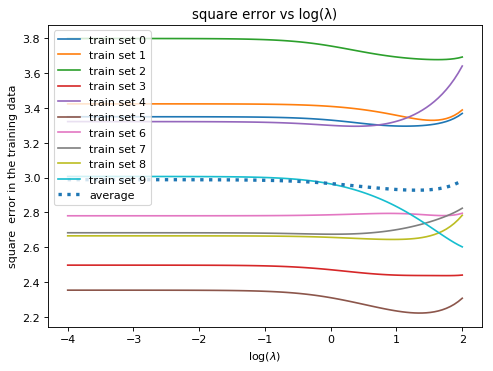

optimal λ =  21.5443469003


In [7]:
    #problem 3(1)
    for i in range(k):
        
        train_data_t = df_train.iloc[indies[i],:].values
        train_data = df_train.iloc[np.setxor1d(np.arange(0,df_train.shape[0]),indies[i]),:].values

        Y = np.asarray(train_data[:,0:1],dtype=np.float32)
        X = np.asarray(train_data[:,1:],dtype=np.float32)
        
        # add bias column into features matrix X.
        X1 = np.concatenate((np.ones((X.shape[0],1),float),X),axis = 1)
        
        test_Y = np.asarray(train_data_t[:,0:1],dtype=np.float32)
        test_X = np.asarray(train_data_t[:,1:],dtype=np.float32)

        # add bias column into features matrix X.
        test_X1 = np.concatenate((np.ones((test_X.shape[0],1),float),test_X),axis = 1)     
        
    
        # regularization parameter
        weight = []
        error = []
        for reg in np.logspace(power_s,power_e,num):
            w = normaleq(X1,Y,reg)
            weight.append(w)
            error.append(computeCost(test_X1,test_Y,w,reg))
        
        weighthist.append(weight)
        errorhist.append(error)
        
        # Figures for problem (1) , square error vs log(λ)
        plt.figure(1)
        x = np.linspace(power_s,power_e,num)
        plt.xlabel('log($\lambda$)')
        plt.ylabel('square  error in the training data')
        plt.plot(x,error,label='train set '+ str(i))
        plt.legend(loc='upper left')
        
    #Figure for problem(1), average curve.
    weighthist = np.asarray(weighthist)
    w = np.average(weighthist,axis=0)
    errorhist = np.asarray(errorhist)
    #generate average eorror sequence
    error = np.average(errorhist,axis=0)
    
    plt.plot(x,error,label = 'average',ls = ':',lw = 3)
    plt.legend(loc='upper left')
    plt.title('square error vs log(λ)')
    plt.show()
    
    # findout the optimal λ.
    opt_idx = np.argmin(error,axis=0)
    reg_opt = np.logspace(power_s,power_e,num)[opt_idx]
    print('optimal λ = ', reg_opt)

* Problem 3(2)
    According to the $\lambda$ you selected in the q1, retrain a new model using all the training data, then calculate the squared error in the test data.

In [8]:
    # Problem 3(2)
    test_data = df_test.values

    test_Y = np.asarray(test_data[:,0:1],dtype=np.float32)
    test_X = np.asarray(test_data[:,1:],dtype=np.float32)
    
    total_train_data = df_train.values

    Y = np.asarray(total_train_data[:,0:1],dtype=np.float32)
    X = np.asarray(total_train_data[:,1:],dtype=np.float32)
    m,n = X.shape
    X1 = np.concatenate((np.ones((X.shape[0],1),float),X),axis = 1)
    w = normaleq(X1,Y,reg_opt)
    
    #add bias column into features matrix X.
    test_X1 = np.concatenate((np.ones((test_X.shape[0],1),float),test_X),axis = 1)
    
    test_error = computeCost(test_X1,test_Y,w,reg_opt)
    print('test_error=',test_error)

test_error= 8.47022688887


* Problem 3(3)  
    A plot of $\lambda$ against the number of small coeffcients (you can set a threshold), and a brief commentary on the task of selecting $\lambda$

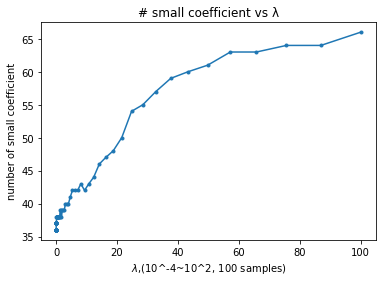

In [9]:
    # Problem 3(3)
    threshold = 1e-2
    weight = []
    #generate weight w for each lambda on the whole training data
    for reg in np.logspace(power_s,power_e,num):
        w = normaleq(X1,Y,reg)
        weight.append(w)
        
    #record number of small coefficients for each λ in a list smallweightnum. 
    smallweightnum = []
    for i in range(num):
        smallweightnum.append(np.size(np.where(np.abs(np.asarray(weight)[i].reshape(X1.shape[1],))<=threshold)))
    
    plt.figure(3)
    x = np.logspace(power_s,power_e,num)
    plt.xlabel('$\lambda$,(10^'+str(power_s)+'~10^'+str(power_e)+', '+str(num)+' samples)')
    plt.ylabel('number of small coefficient')
    plt.plot(x,smallweightnum,marker='.')
    plt.title('# small coefficient vs λ') 
    plt.show()

Normally, the larger the $\lambda$, the stronger regularization effect, and more small coefficients. 

* Problem 3(4)  
    For the $\lambda$ you selected, which variable had the largest (most positive) coecient? What about the most negative? Discuss briely.

In [17]:
    w_opt = weight[opt_idx]
    max_idx = np.argmax(w_opt[1:],axis = 0)[0] + 1 # ignore the bias ,i.e. w0
    min_idx = np.argmin(w_opt[1:],axis = 0)[0] + 1 # ignore the bias ,i.e. w0
    featureslist = df_test.columns
    print('max variable is',featureslist[max_idx],'=',np.max(w_opt[1:]),'\n' 'min variable is',featureslist[min_idx],'=',np.min(w_opt[1:]))
    

max variable is PctIlleg = 0.0607905351271 
min variable is PctKids2Par = -0.0631090928838


    Maximum coefficient is PctIlleg which value is about 0.061; Minimum coefficient is PctKids2Par which value is about -0.064.  
    PctIlleg is percentage of kids born to never married; PctKids2Par is percentage of kids in family housing with two parent.  
    The value of these coefficients mean that if fix other variables, then with every $1\%$ increase in PctIlleg, the violent crime  
    posibility will increase about $0.061\%$, and with every $1\%$ increase in PctKids2Park, the violent crime possibility will decrease about $0.064\%$.